In [17]:
# importing packages
import dvc.api
import numpy as np
import pandas as pd

In [21]:
# Image Disp
from IPython.display import Image

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

# To evaluate end result we have
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [22]:
df = pd.read_csv("../data1/browser.csv")
df

,Unnamed: 0.1,Unnamed: 0,experiment,hour,date,device_make,browser,awareness
0,0,0,1,2,2,4,2,0
1,1,1,1,16,1,13,1,1
2,2,2,1,8,3,13,1,0
3,3,3,0,4,5,43,4,1
4,4,4,0,15,0,13,1,0
...,...,...,...,...,...,...,...,...
1238,1238,1238,1,21,2,13,1,1
1239,1239,1239,1,1,1,13,1,1
1240,1240,1240,0,7,6,13,1,0
1241,1241,1241,0,16,7,13,1,0


In [23]:
# Define Y (This is the value we will predict)
y = df["awareness"]

# Droping "class" from X
X = df.drop(columns = ['awareness']).copy()
X

,Unnamed: 0.1,Unnamed: 0,experiment,hour,date,device_make,browser
0,0,0,1,2,2,4,2
1,1,1,1,16,1,13,1
2,2,2,1,8,3,13,1
3,3,3,0,4,5,43,4
4,4,4,0,15,0,13,1
...,...,...,...,...,...,...,...
1238,1238,1238,1,21,2,13,1
1239,1239,1239,1,1,1,13,1
1240,1240,1240,0,7,6,13,1
1241,1241,1241,0,16,7,13,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

Logistic Regression

In [25]:
# Define Logistic Regression Model
log = LogisticRegression()
# We fit our model with our train data
log.fit(X_train, y_train)
# Then predict results from X_test data
pred_log = log.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_log[0:10])
print("Actual:", y_test[0:10])

Predicted: [0 1 0 0 0 0 0 0 0 1]
Actual: 496    1
252    0
577    1
277    1
788    1
305    1
935    1
486    0
516    0
438    0
Name: awareness, dtype: int64


XGBoost

In [26]:
# Define XGBoost Model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
# We fit our model with our train data
xgb.fit(
    X_train, y_train,
    # That means if model don't improve it self in 5 rounds, it will stop learning
    # So you can save your time and don't overtrain your model.
    early_stopping_rounds=5,
    # We provide Test data's to evaluate model performance
    eval_set=[(X_test, y_test)],
    verbose=False
 )
# Then predict results from X_test data
pred_xgb = xgb.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_xgb[0:10])
print("Actual:", y_test[0:10])

C:\Users\ACF\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Predicted: [0 0 0 1 0 0 1 1 1 1]
Actual: 496    1
252    0
577    1
277    1
788    1
305    1
935    1
486    0
516    0
438    0
Name: awareness, dtype: int64


In [27]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

Predicted: [1 0 0 1 0 0 0 1 0 0]
Actual: 496    1
252    0
577    1
277    1
788    1
305    1
935    1
486    0
516    0
438    0
Name: awareness, dtype: int64


compare results from the three modeling algorithms

In [28]:
# Logistic Regression
cm_log = confusion_matrix(y_test, pred_log)
# XGBoost 
cm_xgb = confusion_matrix(y_test, pred_xgb)
# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)


print("Confusion Matrixes")
print("Logistic Regression:\n", cm_log)
print("XGBoost:\n", cm_xgb)
print("Random Forest:\n", cm_rf)

Confusion Matrixes
Logistic Regression:
 [[337 127]
 [313  94]]
XGBoost:
 [[260 204]
 [254 153]]
Random Forest:
 [[301 163]
 [263 144]]


Accuracy score

In [29]:
# Logistic Regression
acc_log = accuracy_score(y_test, pred_log)
# XGBoost
acc_xgb = accuracy_score(y_test, pred_xgb)
# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)

print("Accuracy Scores")
print("Logistic Regression:", acc_log)
print("XGBoost:", acc_xgb)
print("Random Forest:", acc_rf)

Accuracy Scores
Logistic Regression: 0.49483352468427094
XGBoost: 0.47416762342135477
Random Forest: 0.5109070034443168


importing pickle module

In [30]:
import pickle

In [31]:
pickle.dump(acc_log, open("../data1/log.pkl", 'wb'))

In [32]:
pickle.dump(acc_xgb, open("../data1/xgb.pkl", 'wb'))

In [33]:
pickle.dump(acc_rf, open("../data1/random_forest.pkl", 'wb'))

In [ ]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
from sklearn.ensemble import RandomForestRegressor

Feature importance of Random Forest

In [35]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
rf.feature_importances_

array([0.24667349, 0.25529685, 0.03179247, 0.1786153 , 0.10678263,
       0.12780722, 0.05303206])

In [45]:
X = df.drop(columns = ['awareness']).copy()
X.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'experiment', 'hour', 'date',
       'device_make', 'browser'],
      dtype='object')

<BarContainer object of 7 artists>

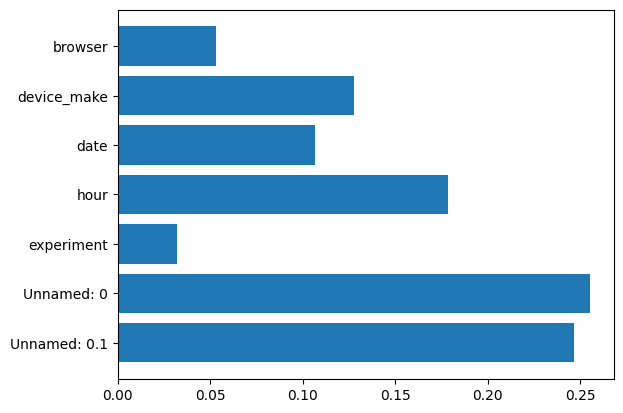

In [46]:
plt.barh(X.columns, rf.feature_importances_)

Feature importance for logistic regression

In [49]:
from sklearn.linear_model import LinearRegression

In [59]:
Log_regression_imp = log.coef_[0]
Log_regression_imp

array([-0.00029862, -0.00029862,  0.18529246,  0.02686805, -0.01027026,
       -0.00674084,  0.04020706])

<BarContainer object of 7 artists>

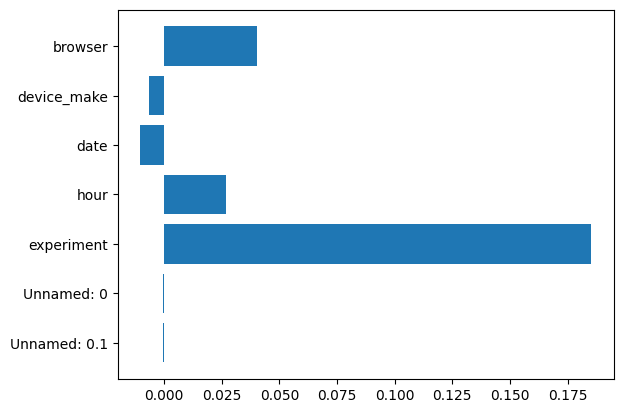

In [61]:
plt.barh(X.columns, log.coef_[0])

Feature importance for XGBoost

In [62]:
xgb.feature_importances_

array([0.23523347, 0.        , 0.1557886 , 0.10442841, 0.15473416,
       0.14592227, 0.20389305], dtype=float32)

In [ ]:
plt.barh(X.columns, model.coef_)